In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('insurance.csv')

In [6]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [7]:
df.shape

(1338, 7)

In [8]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

<Axes: xlabel='age', ylabel='expenses'>

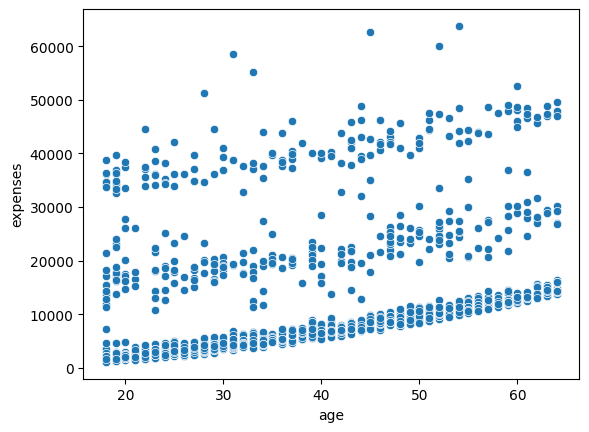

In [11]:
sns.scatterplot(data = df,x = 'age',y = 'expenses')

<Axes: xlabel='bmi', ylabel='expenses'>

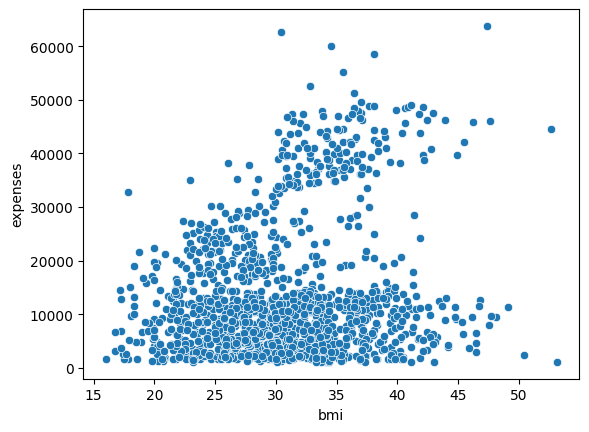

In [12]:
sns.scatterplot(data = df,x = 'bmi',y = 'expenses')

C:\Users\SIDDHARTHA SATYAM\AppData\Local\Temp\ipykernel_34852\198110187.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True,fmt = '0.2f')


<Axes: >

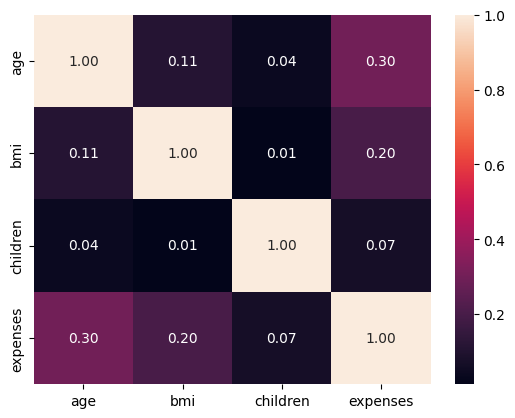

In [13]:
sns.heatmap(df.corr(), annot = True,fmt = '0.2f')

In [14]:
from sklearn import preprocessing

In [15]:
label_encoder = preprocessing.LabelEncoder()

In [16]:
df['sex']= label_encoder.fit_transform(df['sex'])

In [17]:
df['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int32

In [18]:
df['smoker']= label_encoder.fit_transform(df['smoker'])

In [19]:
df['region']= label_encoder.fit_transform(df['region'])

In [20]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [21]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [22]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1


In [23]:
X.tail()

,age,sex,bmi,children,smoker,region
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3
1337,61,0,29.1,0,1,1


In [24]:
Y.tail()

1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, dtype: float64

In [25]:
x1, x2, y1, y2 = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()
model.fit(x1,y1)

LinearRegression()

In [28]:
model.predict(x2[:2])

array([ 1869.92956087, 11934.0275005 ])

In [29]:
model.score(x2,y2)*100

74.45469182584412

In [30]:
model.coef_

array([  251.35879408,   -35.63708495,   330.82990735,   589.23601981,
       23904.71270427,  -323.66576288])

In [31]:
model.intercept_

-11749.437413039697

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x1 = sc.fit_transform(x1)
x2 = sc.transform(x2)


In [33]:
x1

array([[-1.33631918, -1.01886959, -1.42387882, -0.93004238, -0.50729114,
        -1.3755987 ],
       [-0.18052529,  0.98147988,  0.03411165,  1.56197434, -0.50729114,
        -0.47148899],
       [ 1.33645421, -1.01886959,  0.39860927, -0.93004238, -0.50729114,
         1.33673044],
       ...,
       [ 1.55316556,  0.98147988,  2.10512084, -0.93004238, -0.50729114,
         1.33673044],
       [ 0.83079438, -1.01886959, -0.8108601 , -0.09937014, -0.50729114,
         1.33673044],
       [ 1.33645421, -1.01886959,  0.28263275, -0.09937014, -0.50729114,
        -1.3755987 ]])

In [34]:
x2

array([[-1.19184495,  0.98147988, -1.14222157, -0.93004238, -0.50729114,
        -1.3755987 ],
       [ 1.11974285, -1.01886959, -0.14813716, -0.93004238, -0.50729114,
        -1.3755987 ],
       [ 0.75855726,  0.98147988, -0.52920285, -0.09937014, -0.50729114,
        -1.3755987 ],
       ...,
       [ 1.55316556, -1.01886959, -0.26411367, -0.93004238,  1.97125461,
        -0.47148899],
       [ 0.61408302,  0.98147988,  1.09446836,  0.7313021 , -0.50729114,
         0.43262072],
       [ 0.83079438,  0.98147988, -0.97654084,  0.7313021 ,  1.97125461,
        -0.47148899]])

In [35]:
x1.mean()

8.093214572033851e-17

In [37]:
import pickle as pkl

filepath = 'saved_model.sav'

pkl.dump(model,open(filepath,'bw'))

In [38]:
import pickle as pkl
load_model = pkl.load(open('saved_model.sav','br'))

In [39]:
load_model

LinearRegression()

In [40]:
model.predict(x2[:2])

C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-24691.30548503, -23710.10808631])